<a href="https://colab.research.google.com/github/achica1/Intro-ML/blob/main/hmk6_p2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import torch
import torch.nn as nn
import torch.optim as optim
import time

from torchvision import datasets
from torchvision import transforms
import torch.nn.functional as F


In [3]:
data_path = '../data-unversioned/p1ch7/'
cifar10 = datasets.CIFAR10(data_path, train=True, download=True)
cifar10_val = datasets.CIFAR10(data_path, train=False, download=True)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ../data-unversioned/p1ch7/cifar-10-python.tar.gz to ../data-unversioned/p1ch7/
Files already downloaded and verified


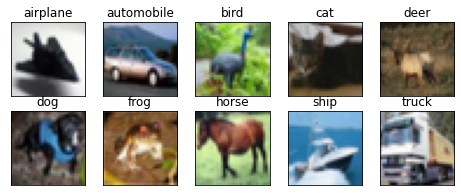

In [4]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

fig = plt.figure(figsize=(8,3))
num_classes = 10
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    ax.set_title(class_names[i])
    img = next(img for img, label in cifar10 if label == i)
    plt.imshow(img)
plt.show()


In [5]:
cifar10 = datasets.CIFAR10(data_path, train=True, download=False,
                          transform=transforms.Compose([
                              transforms.ToTensor(),
                              transforms.Normalize((0.4915, 0.4823, 0.4468),
                                                   (0.2470, 0.2435, 0.2616))
                          ]))

In [6]:
cifar10_val = datasets.CIFAR10(data_path, train=False, download=False,
                          transform=transforms.Compose([
                              transforms.ToTensor(),
                              transforms.Normalize((0.4915, 0.4823, 0.4468),
                                                   (0.2470, 0.2435, 0.2616))
                          ]))

In [7]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(16, 8, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(8 * 8 * 8, 32)
        self.fc2 = nn.Linear(32, 10)
        
    def forward(self, x):
        out = F.max_pool2d(torch.relu(self.conv1(x)), 2)
        out = F.max_pool2d(torch.relu(self.conv2(out)), 2)
        out = out.view(-1, 8 * 8 * 8)
        out = torch.tanh(self.fc1(out))
        out = self.fc2(out)
        return out

# Problem 2a
Build a Convolutional Neural Network, like what we built in lectures to classify the images across all 10 classes in CIFAR 10. You need to adjust the fully connected layer at the end properly with respect to the number of output classes. Train your network for 300 epochs.

In [8]:
if torch.cuda.is_available():
    # Create a device object for the GPU
    device = torch.device('cuda')
else:
    # Create a device object for the CPU
    device = torch.device('cpu')
device


device(type='cuda')

In [9]:
train_loader = torch.utils.data.DataLoader(cifar10, batch_size=64, shuffle=True)

model = Net()
model = model.to(device)

learning_rate = 1e-3

optimizer = optim.SGD(model.parameters(), lr=learning_rate)

loss_fn = nn.CrossEntropyLoss()

n_epochs = 300

train_epochs = []
train_loss = []

for epoch in range(n_epochs):
    start_time = time.time()
    for imgs, labels in train_loader:
        imgs = imgs.to(device)
        labels = labels.to(device)
        outputs = model(imgs)
        loss = loss_fn(outputs, labels)
                
        optimizer.zero_grad()
        torch.cuda.empty_cache()
        loss.backward()
        optimizer.step()

    train_epochs.append(epoch)
    train_loss.append(float(loss))
    if epoch % 25 == 0 or epoch == 299:
        print("Epoch: %d, Loss: %f" % (epoch, float(loss)))
end_time = time.time()
elapsed = end_time - start_time

print("Training Time was:", elapsed, "seconds.")

Epoch: 0, Loss: 2.272025
Epoch: 25, Loss: 1.390023
Epoch: 50, Loss: 1.488301
Epoch: 75, Loss: 1.344711
Epoch: 100, Loss: 1.180800
Epoch: 125, Loss: 0.864284
Epoch: 150, Loss: 0.920995
Epoch: 175, Loss: 0.861506
Epoch: 200, Loss: 0.887757
Epoch: 225, Loss: 0.856438
Epoch: 250, Loss: 0.754266
Epoch: 275, Loss: 0.655363
Epoch: 299, Loss: 0.594584
Training Time was: 10.763557195663452 seconds.


In [10]:
# Printing training accuracy
train_loader = torch.utils.data.DataLoader(cifar10, batch_size=64, shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in train_loader:
        imgs = imgs.to(device)
        labels = labels.to(device)
        outputs = model(imgs)
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
               
print("Training Accuracy: %f" % (correct / total))

# Printing Validation accuracy
val_loader = torch.utils.data.DataLoader(cifar10_val, batch_size=64, shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in val_loader:
        imgs = imgs.to(device)
        labels = labels.to(device)
        outputs = model(imgs)
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
        
print("Validation Accuracy: %f" % (correct / total))

Training Accuracy: 0.722000
Validation Accuracy: 0.644300


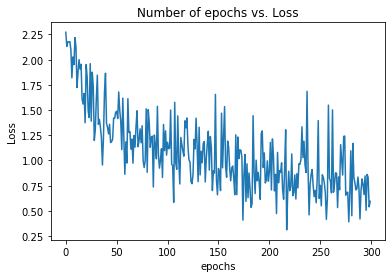

In [11]:
plt.figure(1)
plt.plot(train_epochs, train_loss)
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.title("Number of epochs vs. Loss")
plt.show()

# Problem 2b
Extend your CNN by adding one more additional convolution layer followed by an activation function and pooling function. You also need to adjust your fully connected layer properly with respect to intermediate feature dimensions. Train your network for 300 epochs.

In [13]:
class Net2(nn.Module):
    def __init__(self):
        super(Net2, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(16, 8, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(8 * 8 * 8, 32)
        self.fc2 = nn.Linear(32, 32)
        self.conv3 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.conv4 = nn.Conv2d(16, 8, kernel_size=3, padding=1)
        self.fc3 = nn.Linear(8 * 8 * 8, 32)
        self.fc4 = nn.Linear(32, 10)
        
    def forward(self, x):
        out = F.max_pool2d(torch.relu(self.conv1(x)), 2)
        out = F.max_pool2d(torch.relu(self.conv2(out)), 2)
        out = out.view(-1, 8 * 8 * 8)
        out = torch.tanh(self.fc1(out))
        out = self.fc2(out)
        out = F.max_pool2d(torch.relu(self.conv3(x)), 2)
        out = F.max_pool2d(torch.relu(self.conv4(out)), 2)
        out = out.view(-1, 8 * 8 * 8)
        out = torch.tanh(self.fc3(out))
        out = self.fc4(out)
        return out

In [14]:
start_time = time.time()

train_loader = torch.utils.data.DataLoader(cifar10, batch_size=64, shuffle=True)

model = Net2()
model = model.to(device)

learning_rate = 1e-3

optimizer = optim.SGD(model.parameters(), lr=learning_rate)

loss_fn = nn.CrossEntropyLoss()

n_epochs = 300

train2_epochs = []
train2_loss = []

for epoch in range(n_epochs):
    for imgs, labels in train_loader:
        imgs = imgs.to(device)
        labels = labels.to(device)
        outputs = model(imgs)
        loss = loss_fn(outputs, labels)
                
        optimizer.zero_grad()
        torch.cuda.empty_cache()
        loss.backward()
        optimizer.step()

    train2_epochs.append(epoch)
    train2_loss.append(float(loss))
    if epoch % 25 == 0 or epoch == 300:
        print("Epoch: %d, Loss: %f" % (epoch, float(loss)))
end_time = time.time()
elapsed = end_time - start_time
print("Training Time was:", elapsed, "seconds.")


Epoch: 0, Loss: 2.301071
Epoch: 25, Loss: 1.506289
Epoch: 50, Loss: 0.960054
Epoch: 75, Loss: 1.743933
Epoch: 100, Loss: 1.162849
Epoch: 125, Loss: 0.708864
Epoch: 150, Loss: 1.365221
Epoch: 175, Loss: 1.341063
Epoch: 200, Loss: 0.992282
Epoch: 225, Loss: 0.828496
Epoch: 250, Loss: 0.632488
Epoch: 275, Loss: 0.801420
Training Time was: 3432.4577729701996 seconds.


In [15]:
train_loader = torch.utils.data.DataLoader(cifar10, batch_size=64, shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in train_loader:
        imgs = imgs.to(device)
        labels = labels.to(device)
        outputs = model(imgs)
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
      
        
print("Training Accuracy: %f" % (correct / total))

Training Accuracy: 0.711100


In [16]:
val_loader = torch.utils.data.DataLoader(cifar10_val, batch_size=64, shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in val_loader:
        imgs = imgs.to(device)
        labels = labels.to(device)
        outputs = model(imgs)
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
        
print("Validation Accuracy: %f" % (correct / total))

Validation Accuracy: 0.634500


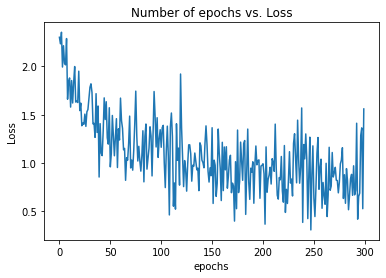

In [18]:
plt.figure(2)
plt.plot(train2_epochs, train2_loss)
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.title("Number of epochs vs. Loss")
plt.show()